<a href="https://colab.research.google.com/github/PrinceGhotar/Image-Compression/blob/main/Image_Compression_using_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as matlab
import seaborn as sns

In [ ]:
#for calculating interval 
from time import time 

In [ ]:
# setting default figure size for the kernal 
plt.rcParams['figure.figsize']=10,8

In [ ]:
import skimage 
print(skimage.__version__)

0.18.3


In [ ]:
# FOR CLUSTERING IMAGE PIXELS
from sklearn.cluster import KMeans
from skimage import io

<function skimage.io._io.show>

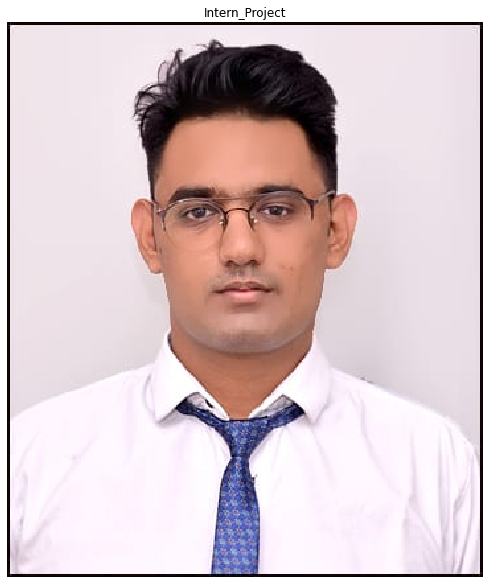

In [ ]:
image_original = io.imread('deepak.png')
plt.axis('off')
io.imshow(image_original)
plt.title ("Intern_Project")
io.show

In [ ]:
image = np.array(image_original,dtype= float)/255

In [ ]:
# Save the dimensions , we will ne need them later
w,h,d = original_shape = image.shape
print('original Shape'.center(20,'='))
print(image.shape)

===original Shape===
(420, 360, 3)


In [ ]:
#image_array_size : w*h,d
image_array= image.reshape(-1,d)
print(image_array.shape)

(151200, 3)


In [ ]:
#64 colour image 
n_colours = [64,32]
t0 = time()
kmeans64 = KMeans(n_clusters=n_colours[0],random_state= 42,verbose=2).fit(image_array)
print('completed 64 clusterz in' + str({round(time()-t0,2)})+'seconds.')


Initialization complete
Iteration 0, inertia 72.3662745097918
Iteration 1, inertia 62.40991722903038
Iteration 2, inertia 60.90158252680371
Iteration 3, inertia 60.04897274529224
Iteration 4, inertia 59.54205310520709
Iteration 5, inertia 59.25736263316483
Iteration 6, inertia 59.08986659471695
Iteration 7, inertia 58.989718209618246
Iteration 8, inertia 58.918761433612985
Iteration 9, inertia 58.870326649514304
Iteration 10, inertia 58.82679871539815
Iteration 11, inertia 58.78773191694667
Iteration 12, inertia 58.75200244352037
Iteration 13, inertia 58.722413940837065
Iteration 14, inertia 58.69304458330072
Iteration 15, inertia 58.660598618062316
Iteration 16, inertia 58.6398631762945
Iteration 17, inertia 58.628747738485735
Iteration 18, inertia 58.61479393678994
Iteration 19, inertia 58.594980637752826
Iteration 20, inertia 58.56297447558683
Iteration 21, inertia 58.54242782366542
Iteration 22, inertia 58.52691398329784
Iteration 23, inertia 58.51553420327386
Iteration 24, inertia

In [ ]:
#32 colour image
t0 = time()
kmeans32 = KMeans(n_clusters=n_colours[1],random_state= 42,verbose=2).fit(image_array)
print('completed 32 clusterz in' + str({round(time()-t0,2)})+'seconds.')


Initialization complete
Iteration 0, inertia 155.64741253366793
Iteration 1, inertia 128.08802651589713
Iteration 2, inertia 124.67547595927809
Iteration 3, inertia 123.10185666396477
Iteration 4, inertia 122.38069864142673
Iteration 5, inertia 121.99676523974401
Iteration 6, inertia 121.70680459586838
Iteration 7, inertia 121.43186563303335
Iteration 8, inertia 121.27232789041886
Iteration 9, inertia 121.09113050359038
Iteration 10, inertia 120.808734765795
Iteration 11, inertia 120.66441865395535
Iteration 12, inertia 120.53823291179398
Iteration 13, inertia 120.33089604016486
Iteration 14, inertia 120.02467221679785
Iteration 15, inertia 119.64400158253628
Iteration 16, inertia 119.26263068629949
Iteration 17, inertia 119.00338937368127
Iteration 18, inertia 118.81559192270714
Iteration 19, inertia 118.64760051871916
Iteration 20, inertia 118.5343566826018
Iteration 21, inertia 118.45377520986948
Iteration 22, inertia 118.38027634871455
Iteration 23, inertia 118.34213411334424
Itera

In [ ]:
labels64= kmeans64.labels_
labels32= kmeans32.labels_
# use of dimensions 
print('within sum of square error for'+ str({n_colours[0]})+ 'clusters='+str({round(kmeans64.inertia_,2)}))
print('within sum of square error for'+ str({n_colours[1]})+ 'clusters='+str({round(kmeans32.inertia_,2)}))


within sum of square error for{64}clusters={56.99}
within sum of square error for{32}clusters={113.57}


In [ ]:
def recreate_image(centroids,labels,w,h):
#centroids variable are calculated from the flattened image
#centroids:w*h,d
#so each row depicts the values per depth
  d = centroids.shape[1]
  image = np.zeros((w,h,d))
  label_idx =0
  for i in range(w):
    for j in range(h):
#filling values in new image with centroid values
      image[i][j]= centroids[labels[label_idx]]
      label_idx += 1
  return image

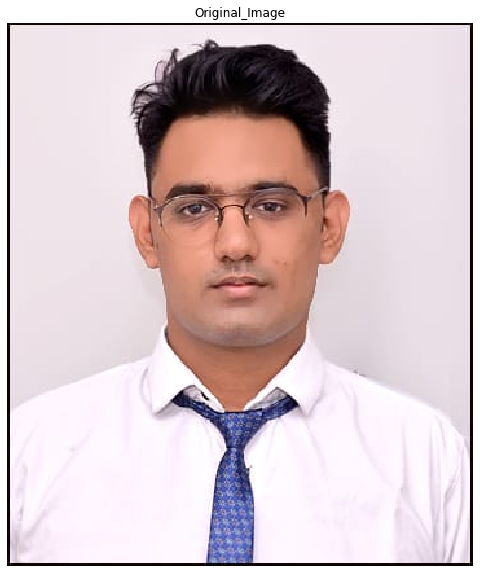

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(132)
plt.axis('off')
plt.title('Original_Image')
io.imshow(image)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


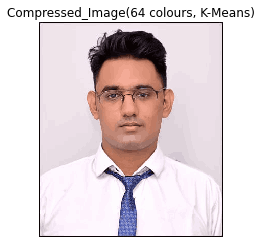

In [ ]:
plt.subplot(131)
plt.axis('off')
plt.title ('Compressed_Image(64 colours, K-Means)')
io.imshow(recreate_image(kmeans64.cluster_centers_,labels64,w,h))
io.imsave('recreate_image_64.png', recreate_image(kmeans64.cluster_centers_,labels64,w,h))

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


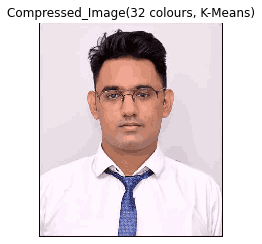

In [ ]:
plt.subplot(131)
plt.axis('off')
plt.title ('Compressed_Image(32 colours, K-Means)')
io.imshow(recreate_image(kmeans32.cluster_centers_,labels32,w,h))
io.imsave('recreate_image_32.png', recreate_image(kmeans32.cluster_centers_,labels32,w,h))